# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 14, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Marcel van de Lagemaat - 10886699 <br>
Anton Andersen - 14718758 

Run the following cell to import some packages, add additional packages yourself when needed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

Matrix is singular when determinant equals zero: 

\begin{align*}
det(A) = 0 \\
1 * \begin{bmatrix} 2 & 1 \\ \alpha & -3/2 \end{bmatrix} - -1 * \begin{bmatrix} 2 & 1 \\ 0 & -3/2\end{bmatrix} + \alpha \begin{bmatrix} 2 & 2 \\ 0 & 
\alpha\end{bmatrix} = 0 \\
2 \alpha^{2} - \alpha - 6 = 0 \\
(\alpha-2)(2\alpha + 3)=0 \\
\alpha = 2 \vee \alpha = -\frac{3}{2}
\end{align*}



## (b) 1 point
For the largest value of $\alpha$ you found above, find a nonzero vector $b$ such that $Ax = b$ has infinitely many solutions. Explain your answer.

For $\alpha=2$ the augmented matrix for $Ax=b$ is: <br>

$
\begin{bmatrix}
1 & -1 & 2  & | & b_1\\ 
2 & 2 & 1 & |  &b_2\\ 
0 & 2 & -3/2 & | & b_3 
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -1 & 2  & | & b_1\\ 
0 & 4 & -3 & |  & b_2 - 2 b_1\\ 
0 & 2 & -3/2 & | & b_3 
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -1 & 2  & | & b_1\\ 
0 & 4 & -3 & |  & b_2 - 2 b_1\\ 
0 & 0 & 0 & | & b_3 - (b_2 - 2 b_1)/2
\end{bmatrix} \\ $ 

Since rank(A) < n, this means that $Ax=b$ has infinitely many solutions when 
\begin{align*}
b_3 - (b_2 - 2 b_1)/2 = 0 \\
b_2 - 2 b_1 = 2b_3
\end{align*}
which means that the vector:
$b = 
\begin{bmatrix} b_1 \\ 2b_3 \\ 0 \end{bmatrix}
$
has infinitely many solutions, for whatever value of $b_3$ you choose. 

# Exercise 2

For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

(Make sure to import the necessary functions/packages.)

In [3]:
from scipy.linalg import lu_factor, lu_solve

def invert(A):
    '''invert the matrix A'''
    LU, piv = lu_factor(A)
    I = np.identity(len(A))
    
    return lu_solve((LU, piv), I)

## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

Solving the problem occurs in three steps, performing the LU decomposition, then solving the equations Ly = b, finally Ux = y.
For the first part (LU decomposition), where you determine the divisions for column j and all rows j+1 until n (underneath the diagonal), the sequence of operations is (n-1) + (n-2) + ... + 1 divisions. By simplifying this expression and summing the sequence, the first part requires $\sum{i} = (n*(n-1)) / 2$ divisions. 
Then, the subtractions to obtain the L and the U matrix, requires$(n - 1)^2 + (n - 2)^2 + ... + 1$ subtractions, by using the sum of the sequnce $\sum{i^2} = \frac{n^3}{3} - \frac{n^2}{2} + \frac{n}{6}$ operations are needed.
To solve for the Ly=b and Ux=y vectors, (n-1)^2 operations are then needed to obtain the solutions to the linear equations. So, $2(\frac{n^3}{3} - \frac{n^2}{2} + \frac{n}{6})$ are used. The final amount of operations is then $\frac{2 n^3}{3} - n^2 + \frac{n}{3} + \frac{n(n-1)}{2}$. The dominant term in the complexity is $n^3$.

# Exercise 3

## (a) (2 points) 
What happens when Gaussian elimination with partial pivoting is used on a matrix of the following form?
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
$$
Do the entries of the transformed matrix grow? What happens if complete pivoting is used instead? (Note that part (a) does not require a computer.)


Column n for the U matrix doubles every row for partial pivoting and the lower triangular becomes zero. While for full pivoting the entries in column n shift to the right side of the diagonal and the lower triangular becomes zero.
For the partial pivoting the upper triangular matrix becomes.
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
     0 &  1 &  0 &  0 &  2 \\
     0 &  0 &  1 &  0 &  4 \\
     0 &  0 &  0 &  1 &  8 \\
     0 &  0 &  0 &  0 &  16 
  \end{bmatrix}
$$
For the full pivoting the upper triangular matrix becomes.
$$
  \begin{bmatrix}
     1 &  1 &  0 &  0 &  0 \\
     0 &  -2 &  1 &  0 &  0 \\
     0 &  0 & -2 &  1 &  0 \\
     0 &  0 &  0 & -2 &  1 \\
     0 &  0 &  0 &  0 & -2 
  \end{bmatrix}
$$

## (b) (2 points)
Write a method that generates a matrix of the form of part (a) of size $n \times n$ for any $n$. Use a library routine for Gaussian elimination with partial pivoting to solve various sizes of linear systems of this form, using right-hand-side vectors chosen so that the solution is known. Try for example the case where the true solution is a vector of uniformly distributed random numbers between 0 and 1. How do the error, residual, and condition number behave as the systems become larger? Comment on the stability (see chapter 1) of Gaussian elimination with partial pivoting in this case.

N.B. This is an artificially contrived system that does not reflect the behavior of Gaussian elimination in realistic examples.

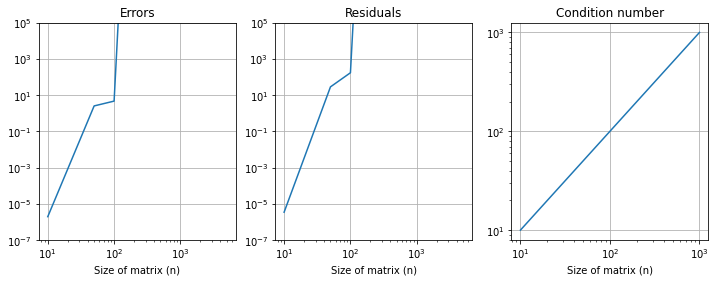

In [59]:
from numpy.linalg import cond, norm
import matplotlib.pyplot as plt

def matrix_gen(n):
    ''' Generate a matrix in the form of part (a) '''
    m = np.zeros([n,n], dtype=np.float32)
    for row in range(n):
        for col in range(n):
            if row == col or col == n-1:
                m[row,col] = 1
            elif row > col:
                m[row,col] = -1 
    return m


def solve_sys(N):
    ''' Solve system Gaussian elimination with partial pivoting '''
    A = matrix_gen(N)
    xTrue = np.float32(np.random.uniform(0,1,len(A)))
    b = A @ xTrue

    LU, piv = lu_factor(A)
    xApprox = lu_solve((LU, piv), b)

    error = norm(xApprox - xTrue)
    resid = norm(np.float64(b) - np.float64((A @ xApprox)))
    condi = cond(A, p=np.inf)

    return error, resid, condi


error_list, residual_list, cond_list = [],[],[]
sizes = np.array([[j * 10 ** i for j in [1,5]] for i in range(1,4)]).flatten()
for n in sizes:
    error, resid, condi = solve_sys(n)
    # Change nan values to very large for the plots
    if np.isnan(error):
        error = 10**50
    if np.isnan(resid):
        resid = 10**50
    if np.isnan(condi):
        condi = 10**50
    error_list.append(error)
    residual_list.append(resid)
    cond_list.append(condi)

res = [error_list, residual_list, cond_list]
titles = ['Error', 'Residual', 'Condition number']
limits = [(10 ** -7, 10 ** 5), (10 ** -7, 10 ** 5), (10**1, 10**3)]

fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(axes)):
    axes[i].loglog(sizes, res[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylim(limits[i])
    axes[i].set_xlabel('Size of matrix (n)')
    axes[i].grid()
plt.show()

In the graphs above we can see how error, residual and condition number behave for an increasingly larger matrix. Both errors and residuals get very large for any value $n > 10^{2}$. The condition number however increases linearly with the size of the matrix. This means that Gaussian elimination with partial pivoting is stable for $n < 10^{2} $, but already shows large errors if n approaches $10^2$. 